9.0 0.00048828125 0.111111111111 768
[1.         0.33333333 0.2        0.14285714 0.11111111 0.09090909
 0.07692308 0.06666667 0.05882353 0.05263158 0.04761905 0.04347826
 0.04       0.03703704 0.03448276 0.03225806 0.03030303 0.02857143
 0.02702703 0.02564103 0.02439024 0.02325581 0.02222222 0.0212766
 0.02040816 0.01960784 0.01886792 0.01818182 0.01754386 0.01694915
 0.01639344 0.01587302]
[  9.  27.  45.  63.  81.  99. 117. 135. 153. 171. 189. 207. 225. 243.
 261. 279. 297. 315. 333. 351. 369. 387. 405. 423. 441. 459. 477. 495.
 513. 531. 549. 567.]


Text(0,0.5,'Power')

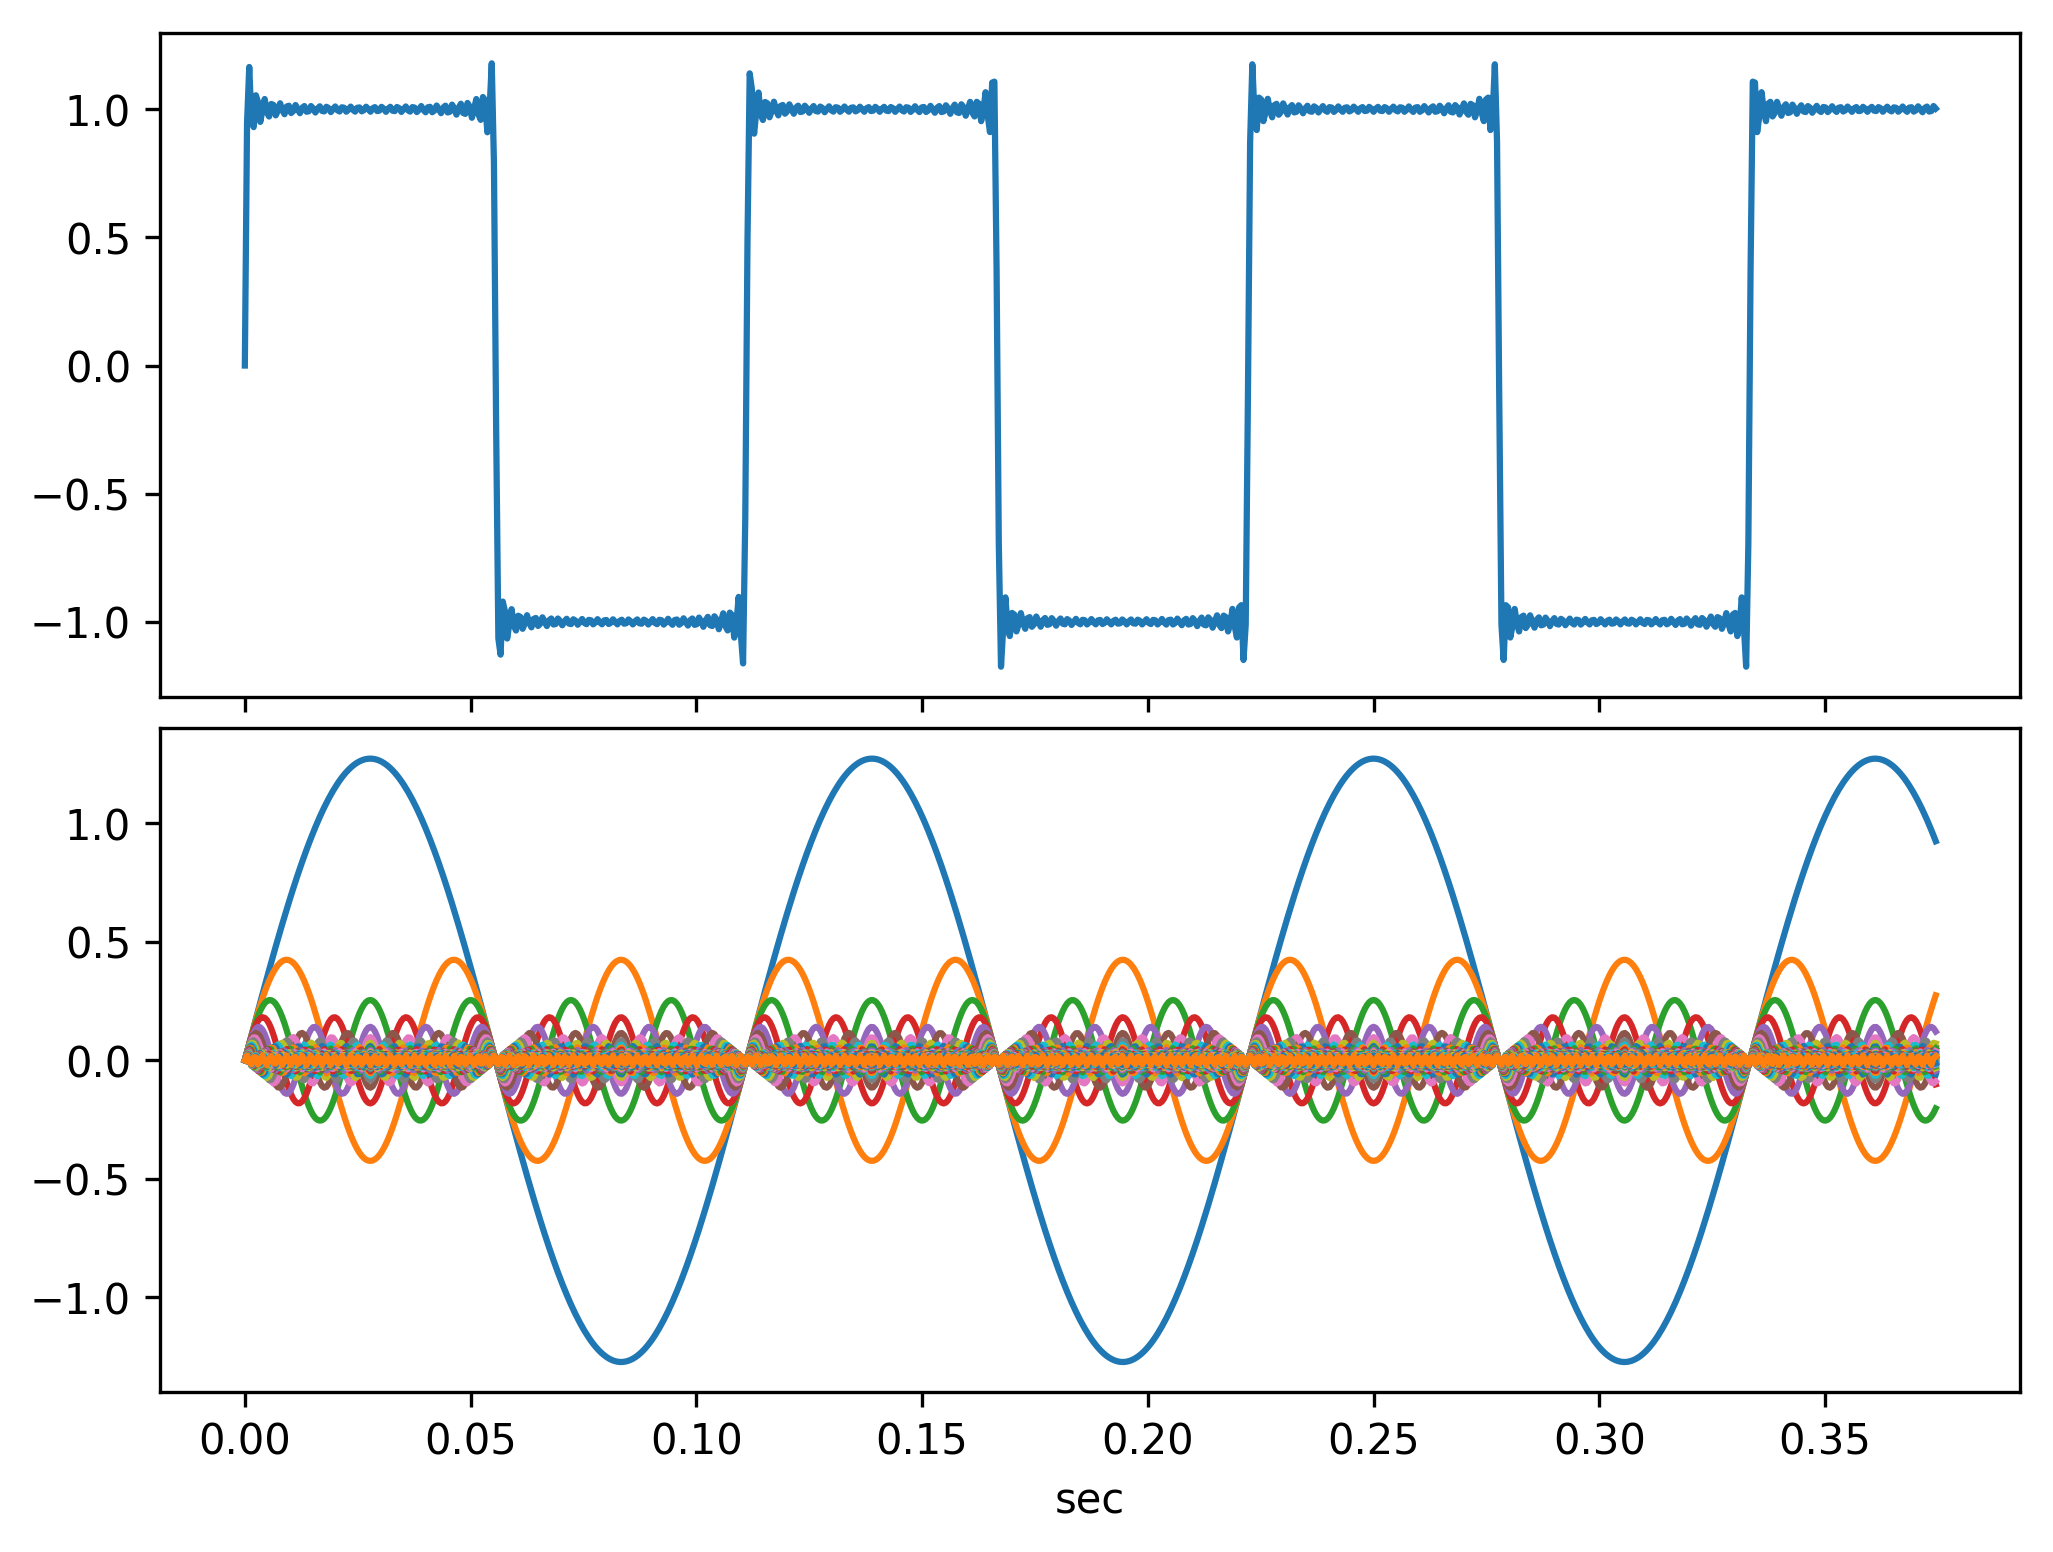

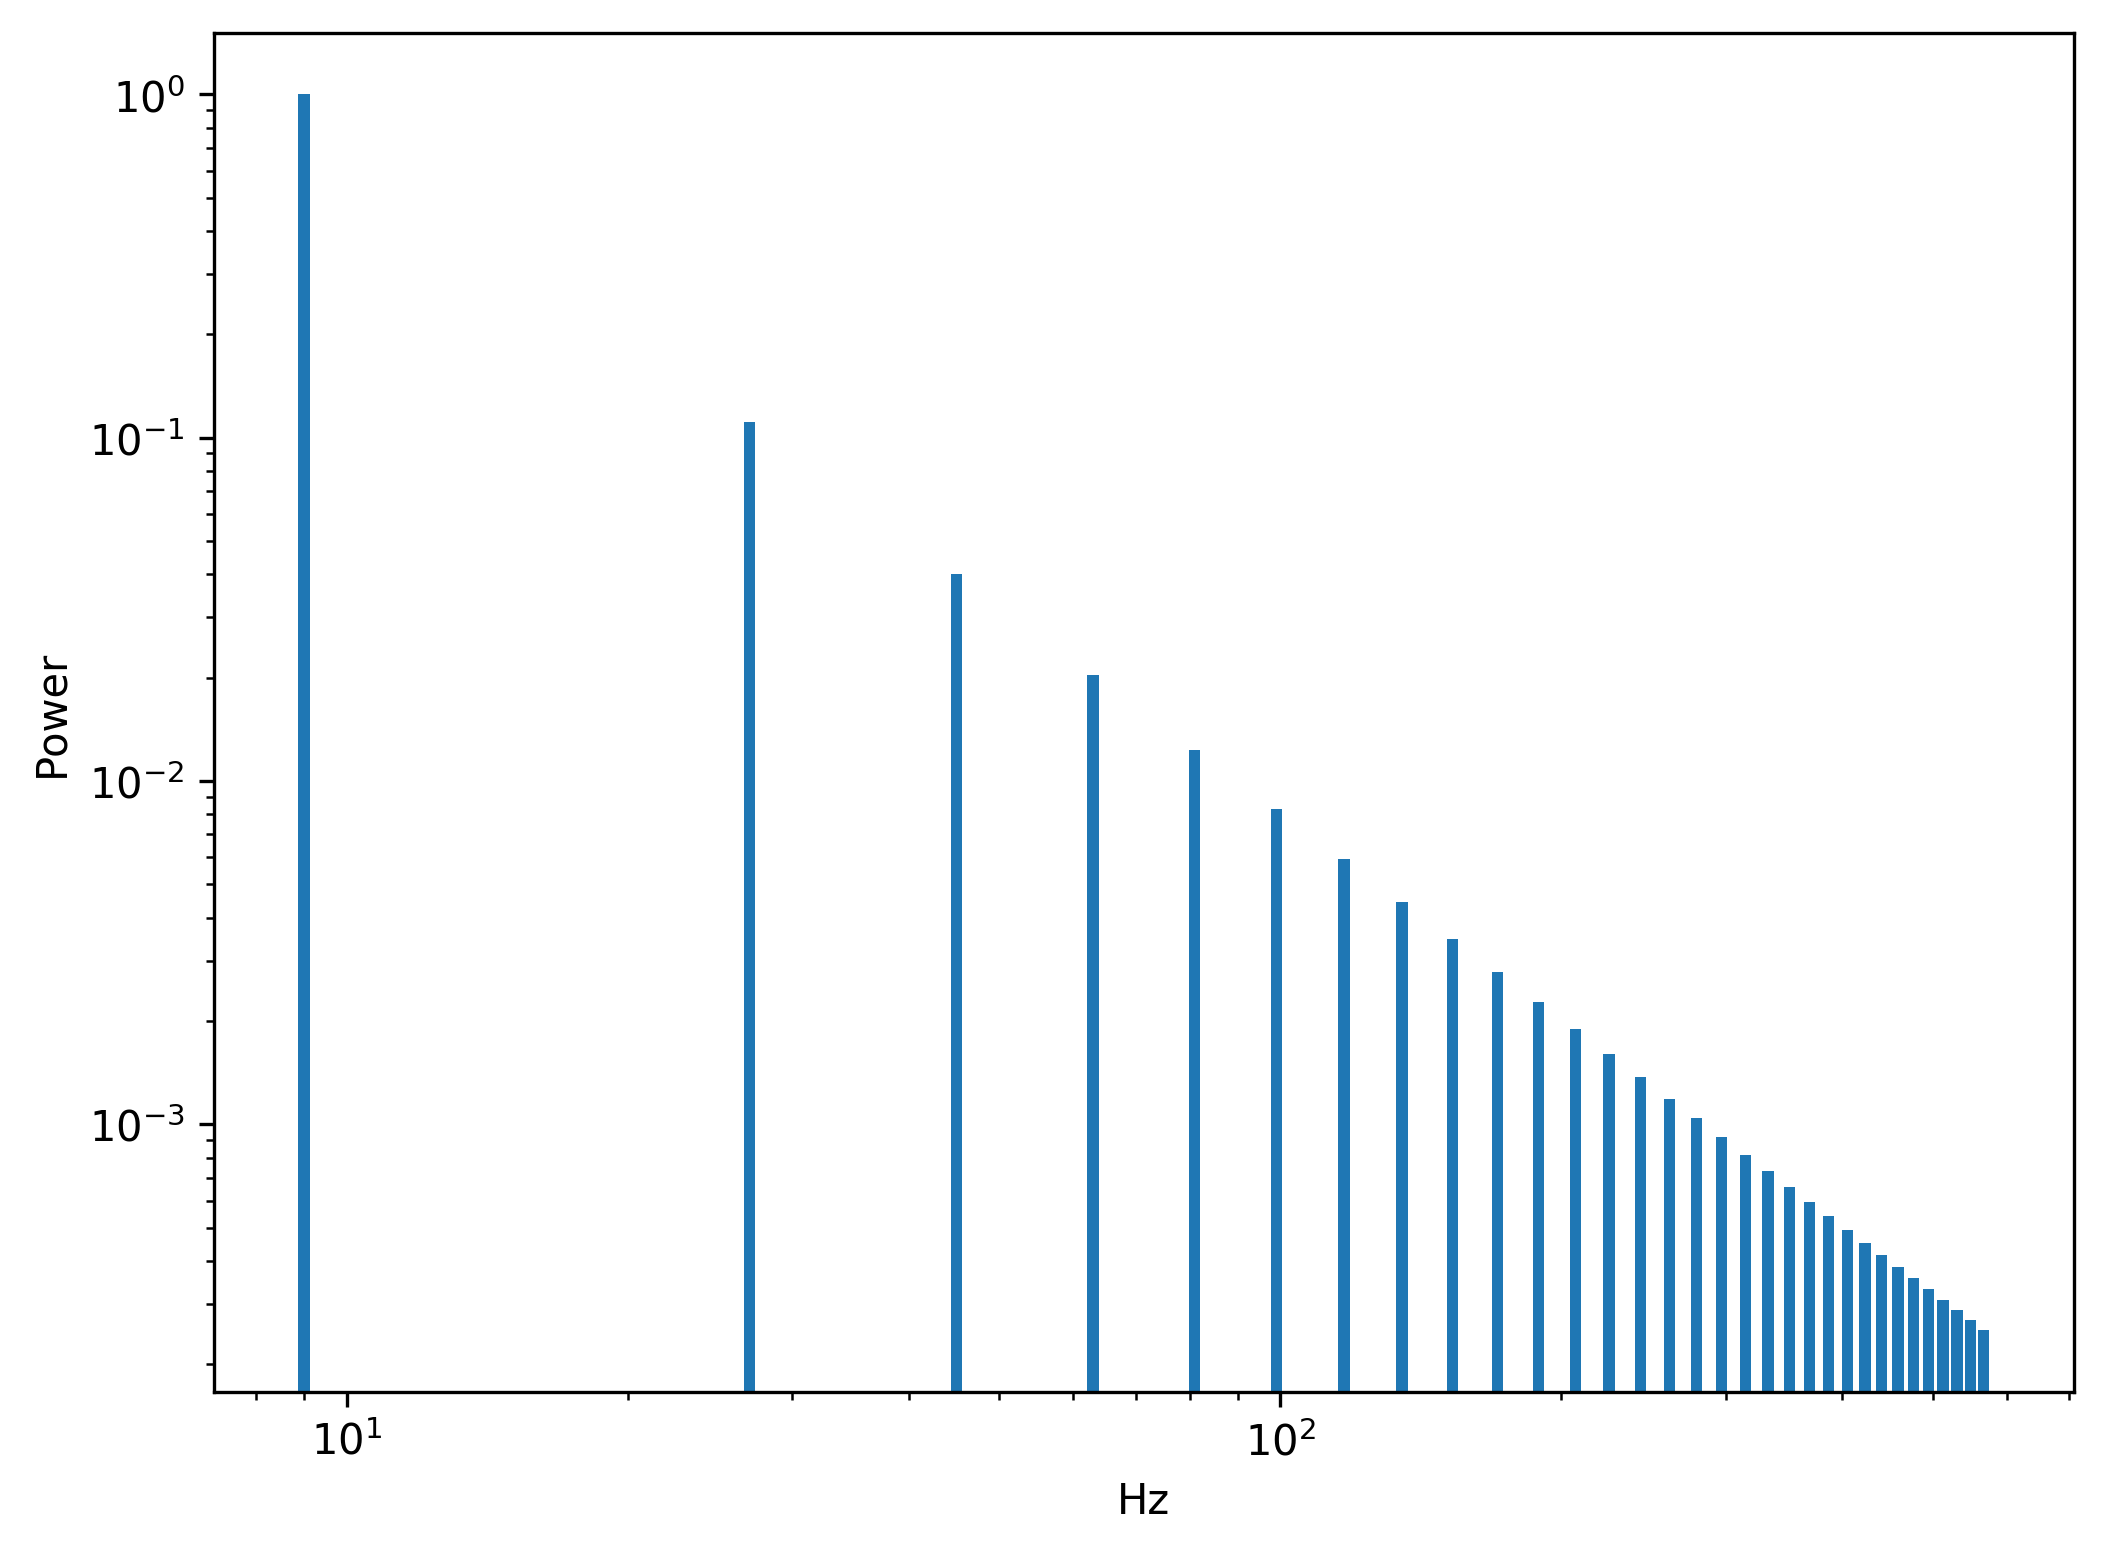

In [31]:
import numpy as np
from pylab import *
%matplotlib inline

k_max = 32
n = 2048
dt = 1./n

id_st = 15117063
# id_st = 15117078
# np.random.seed(seed=id_st)
f0 = float(np.random.randint(8,16))
# f0 = 16.
p0 = f0**-1

t = np.arange(0,3/8.,dt)
# t = np.arange(0,3*p0,dt)
# t =  np.array(range(n))*dt
nt = len(t)
print f0,dt, p0, nt

col_an = np.array([ (2*i+1)**-1 for i in range(k_max)])
col_bn = np.array([ (2*i+1) for i in range(k_max)])
nk = len(col_an)

print col_an
print col_bn*f0

xk = []
x = np.zeros([nt])

for i in range(nk):
    ak = col_an[i]
    f = col_bn[i]*f0
    omega = f*2*np.pi

    power = ak**2
#     amp_div = 1/np.sqrt(1+1/(rc*omega)**2)
#     ak_div = ak*amp_div
#     phi_div = np.arctan2(1,rc*omega)
#     amp_int = 1/np.sqrt(1+(rc*omega)**2)
#     ak_int = ak*amp_int
#     phi_int = -np.arctan2(rc*omega,1)
# #     print power
    xk.append(4/np.pi*ak*np.sin(np.array(t)*(omega)))
    x = x + 4/np.pi*ak*np.sin(np.array(t)*(omega))
#     xk_div.append(4/np.pi*ak_div*np.sin(np.array(t)*(omega)+phi_div))
#     x_div = x_div + 4/np.pi*ak_div*np.sin(np.array(t)*(omega)+phi_div)
#     xk_int.append(4/np.pi*ak_int*np.sin(np.array(t)*(omega)+phi_int))
#     x_int = x_int + 4/np.pi*ak_int*np.sin(np.array(t)*(omega)+phi_int)



import matplotlib.gridspec as gridspec
    
figure(0,figsize=(8,6),dpi=300)
gs = gridspec.GridSpec(4, 4)
gs.update(hspace=0.1)
ax_lc = subplot(gs[0:2, 0:4])
ax_sin = subplot(gs[2:4, 0:4], sharex=ax_lc)
ax_lc.plot(t,x)
setp(ax_lc.get_xticklabels(), visible=False)
# ax_lc.set_xlim([-0.01,0.26])
for i in range(nk):
    ax_sin.plot(t,xk[i])
xlabel("sec")


figure(1,figsize=(8,6),dpi=300)
bar(col_bn*f0, col_an**2,width=col_bn/4.,align="center",log=True)
xscale("log")
# yscale("log")
xlabel("Hz")
ylabel("Power")





Text(0,0.5,'Power')

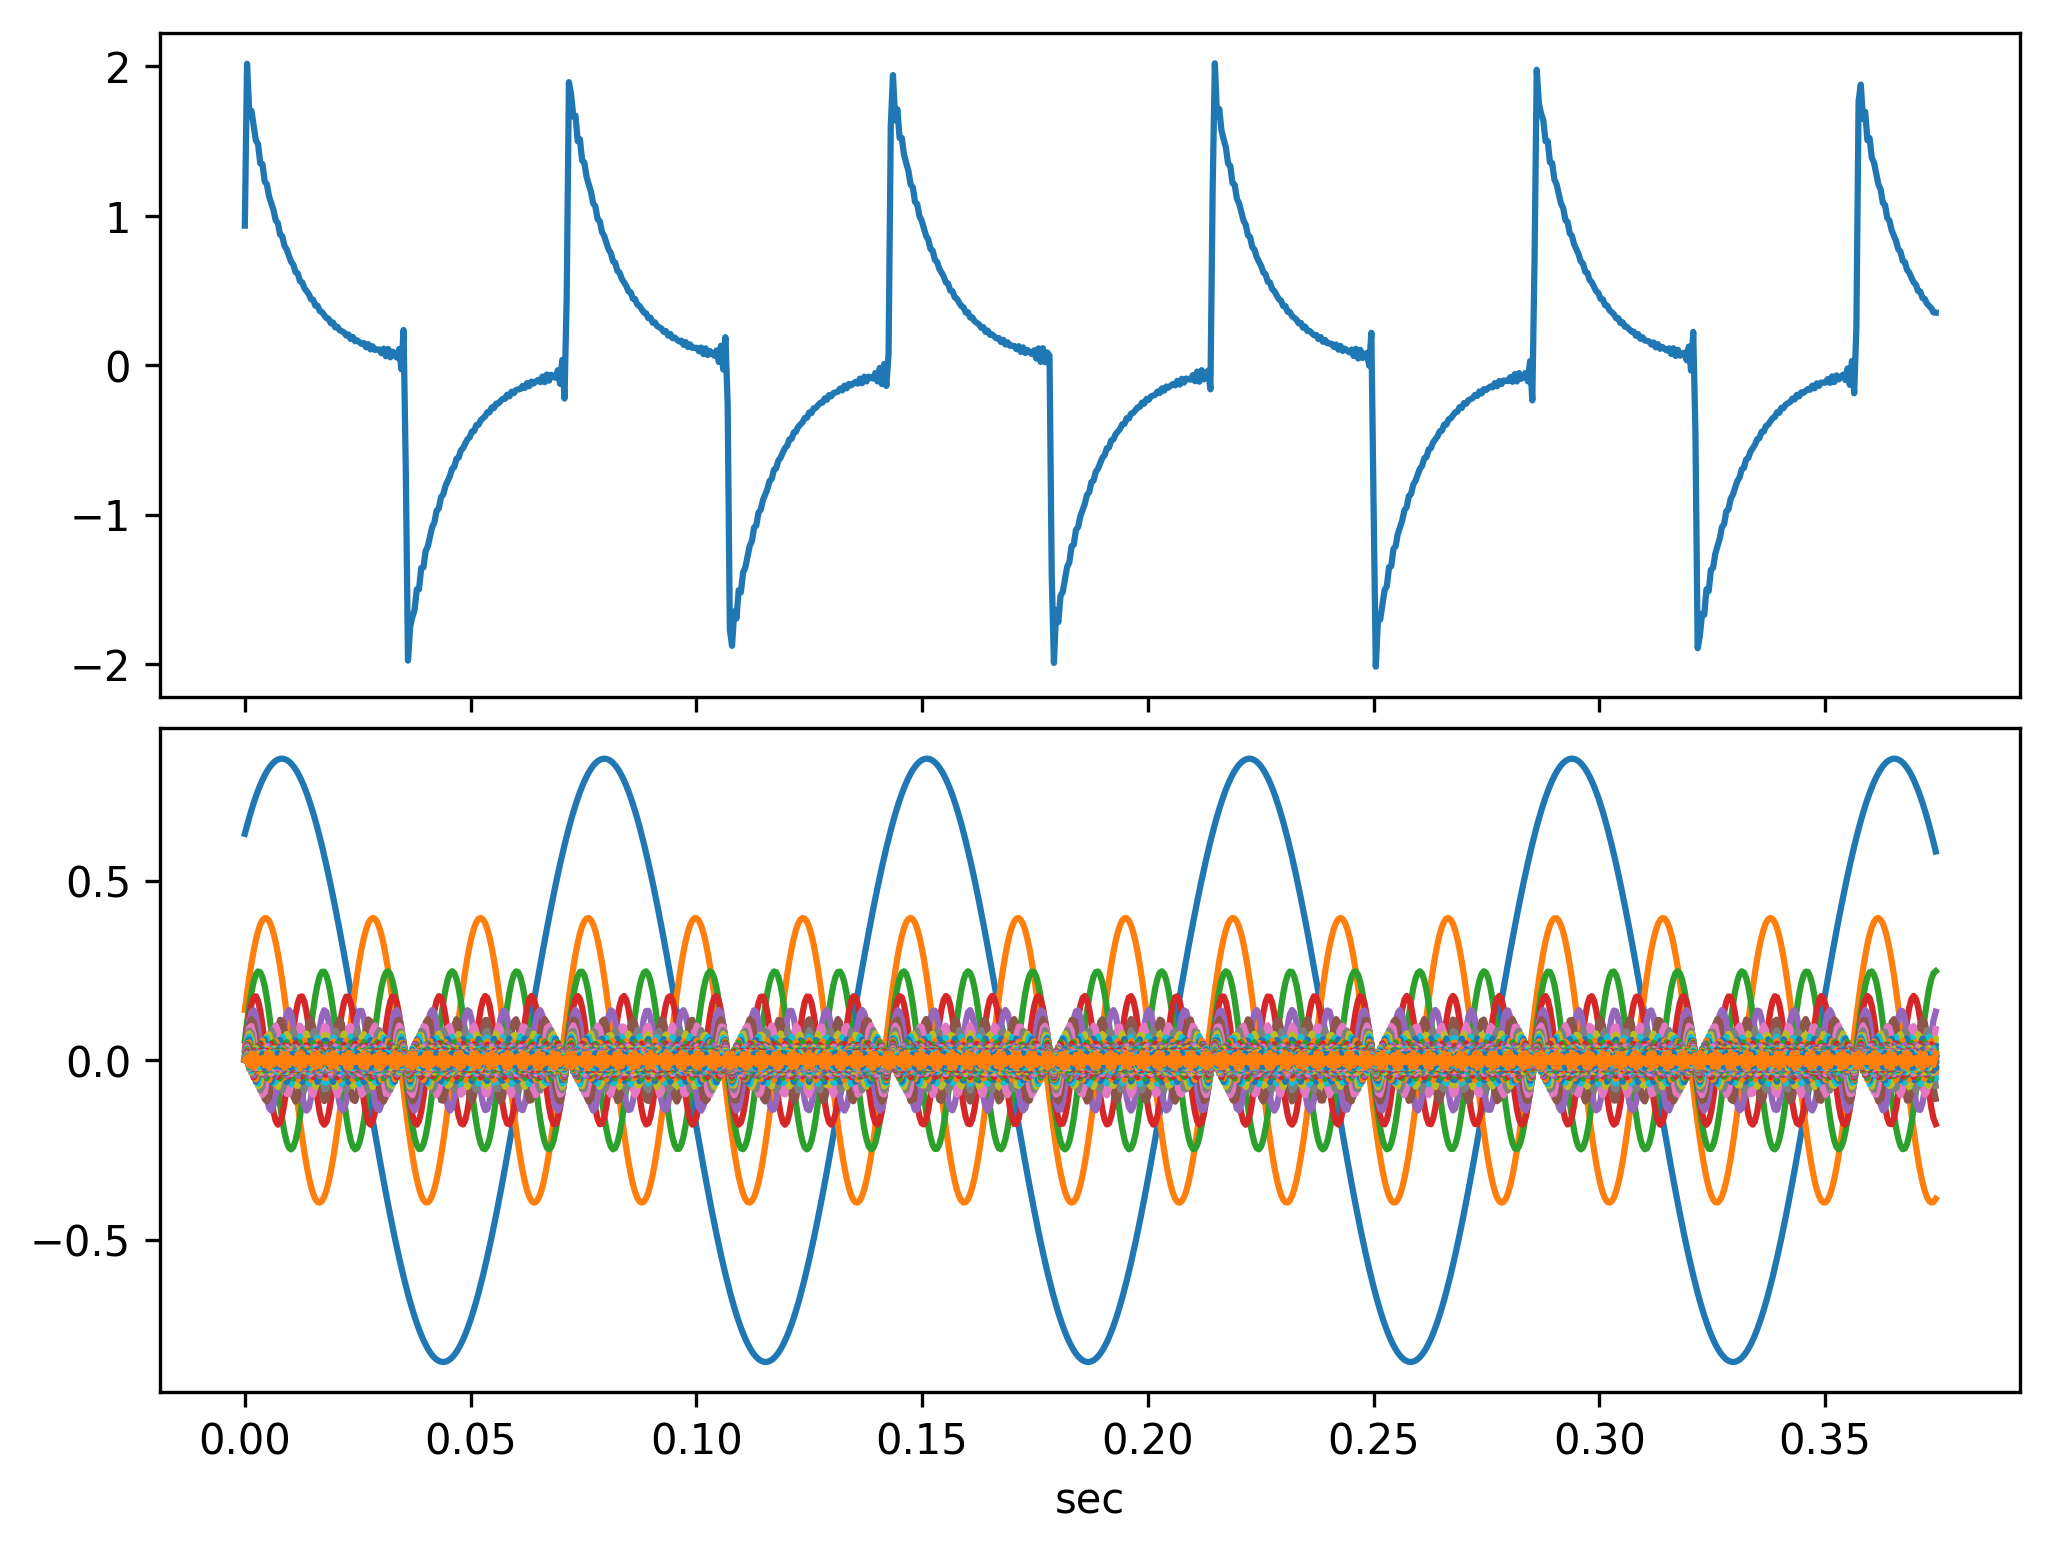

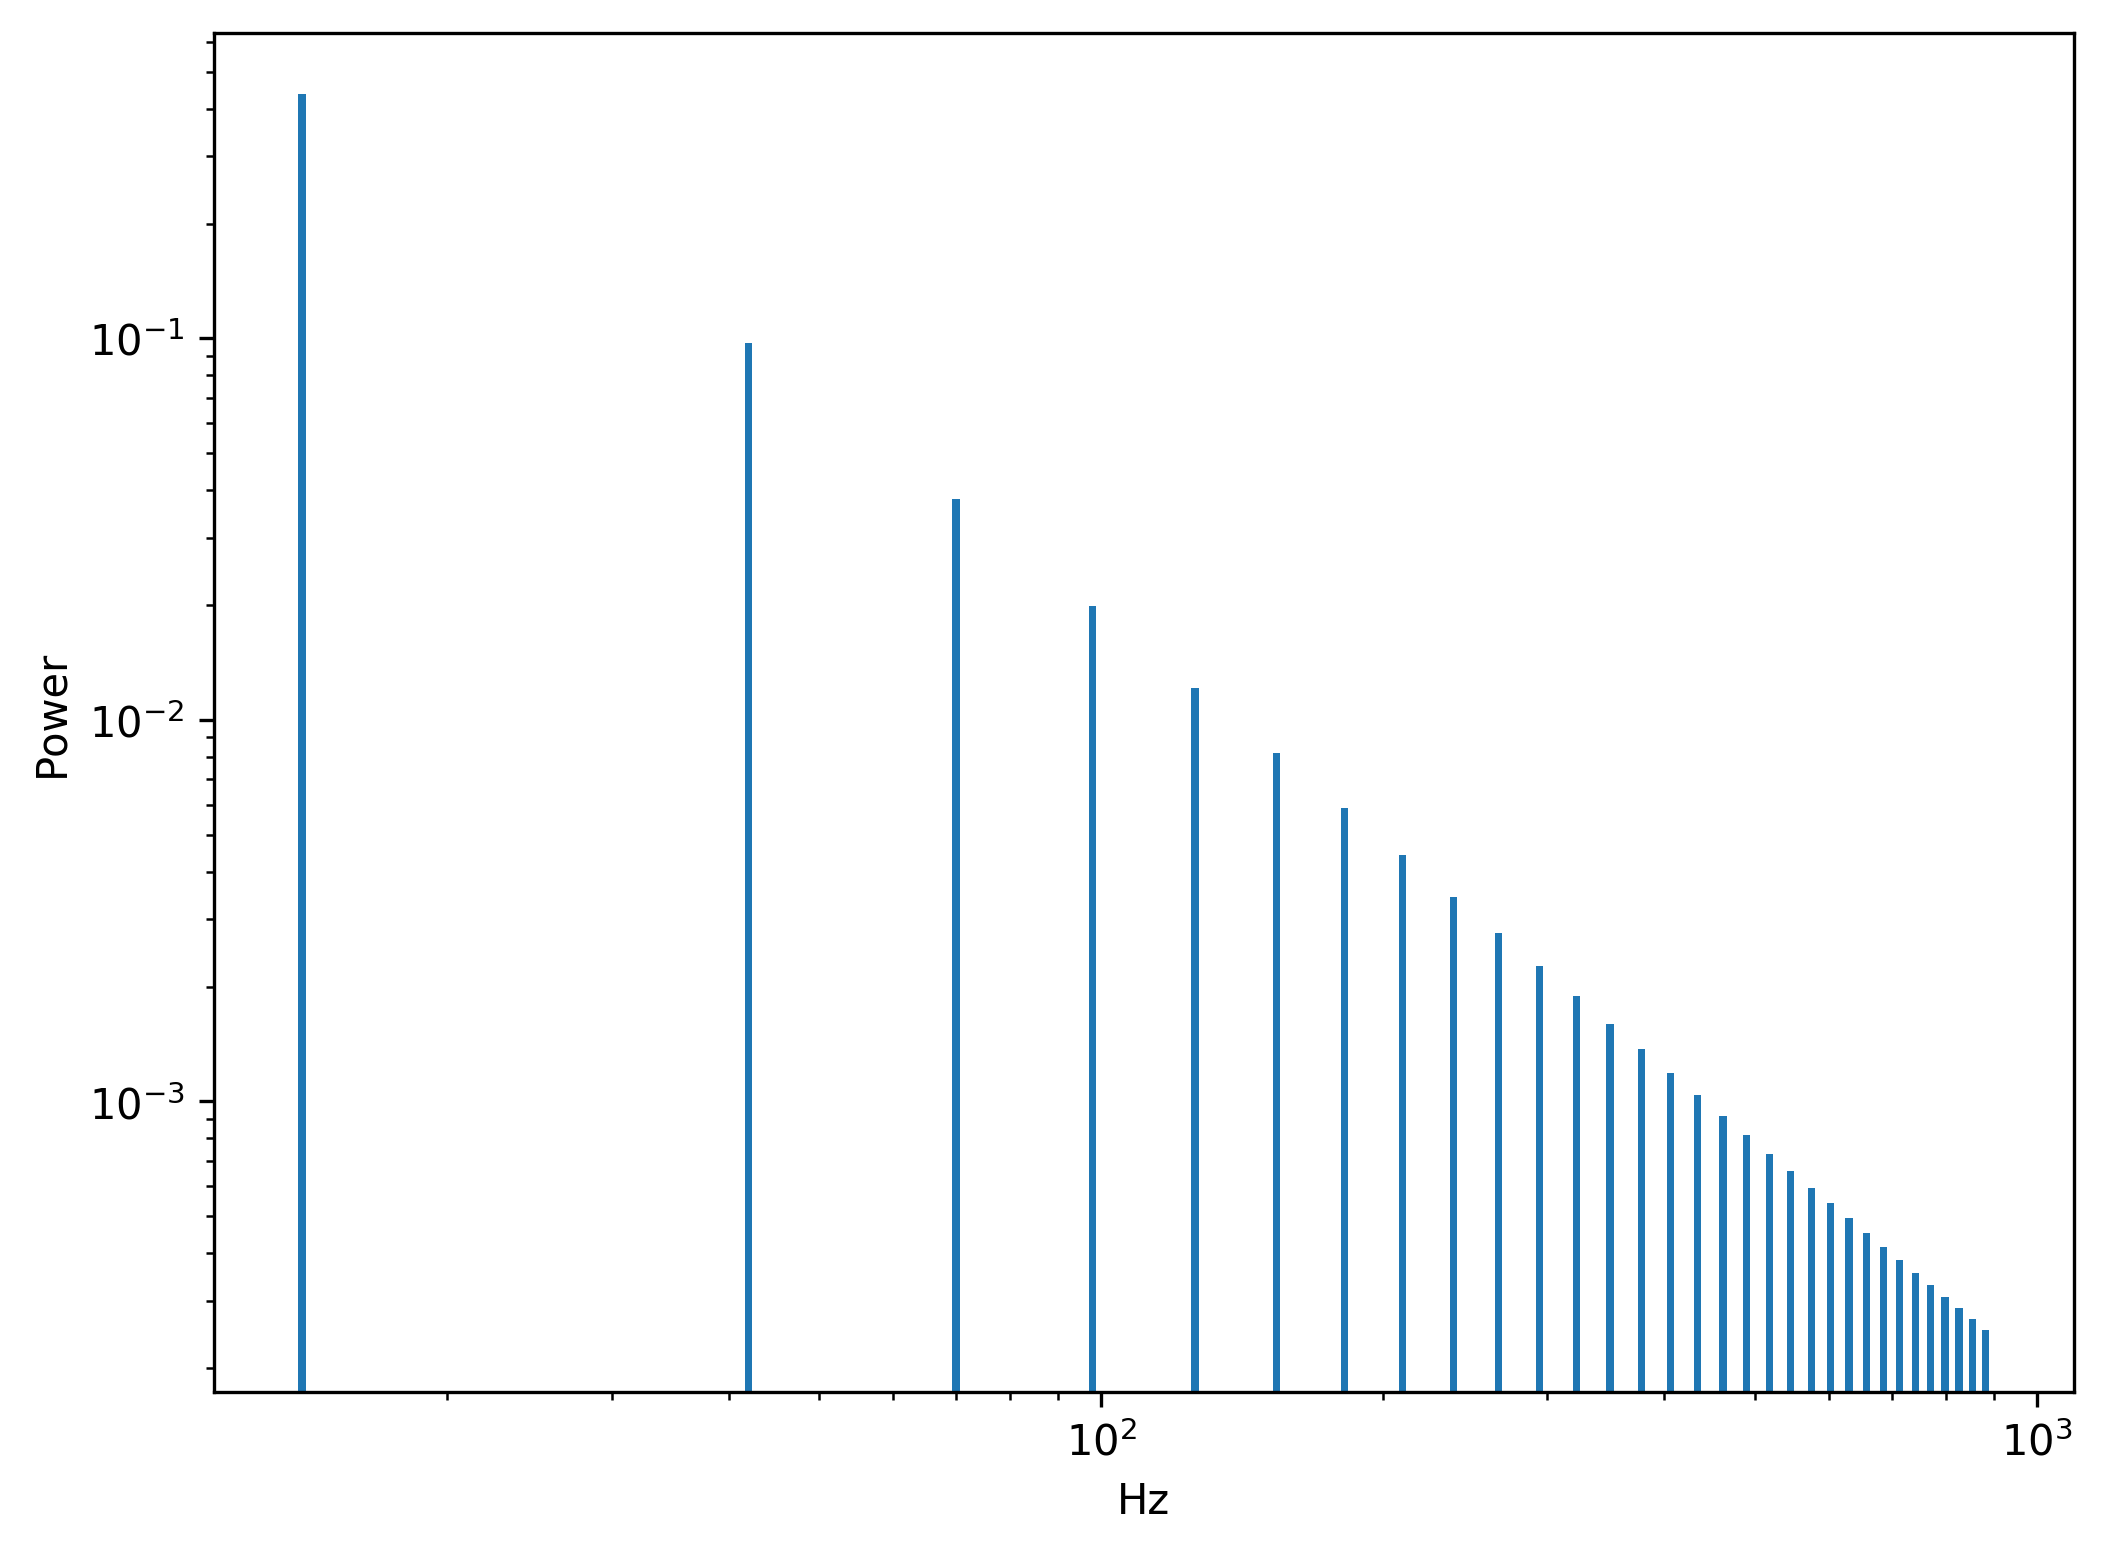

In [27]:
rc = 0.01

xk_div = []
x_div = np.zeros([nt])
ak_div = []

for i in range(len(col_an)):
    ak = col_an[i]
    f = col_bn[i]*f0
    omega = f*2*np.pi

    amp_div = 1/np.sqrt(1+1/(rc*omega)**2)
    ak_div.append(ak*amp_div)
    phi_div = np.arctan2(1,rc*omega)
    xk_div.append(4/np.pi*ak*amp_div*np.sin(np.array(t)*(omega)+phi_div))
    x_div = x_div + 4/np.pi*ak*amp_div*np.sin(np.array(t)*(omega)+phi_div)

figure(0,figsize=(8,6),dpi=300)
gs = gridspec.GridSpec(4, 4)
gs.update(hspace=0.1)
ax_lc_div = subplot(gs[0:2, 0:4])
ax_sin_div = subplot(gs[2:4, 0:4], sharex=ax_lc_div)
ax_lc_div.plot(t,x_div)
setp(ax_lc_div.get_xticklabels(), visible=False)
# ax_lc_div.set_xlim([-0.01,0.26])
for i in range(len(col_an)):
    ax_sin_div.plot(t,xk_div[i])
xlabel("sec")


figure(1,figsize=(8,6),dpi=300)
bar(col_bn*f0, np.array(ak_div)**2,width=col_bn/4.,align="center",log=True)
xscale("log")
# yscale("log")
xlabel("Hz")
ylabel("Power")




Text(0,0.5,'Power')

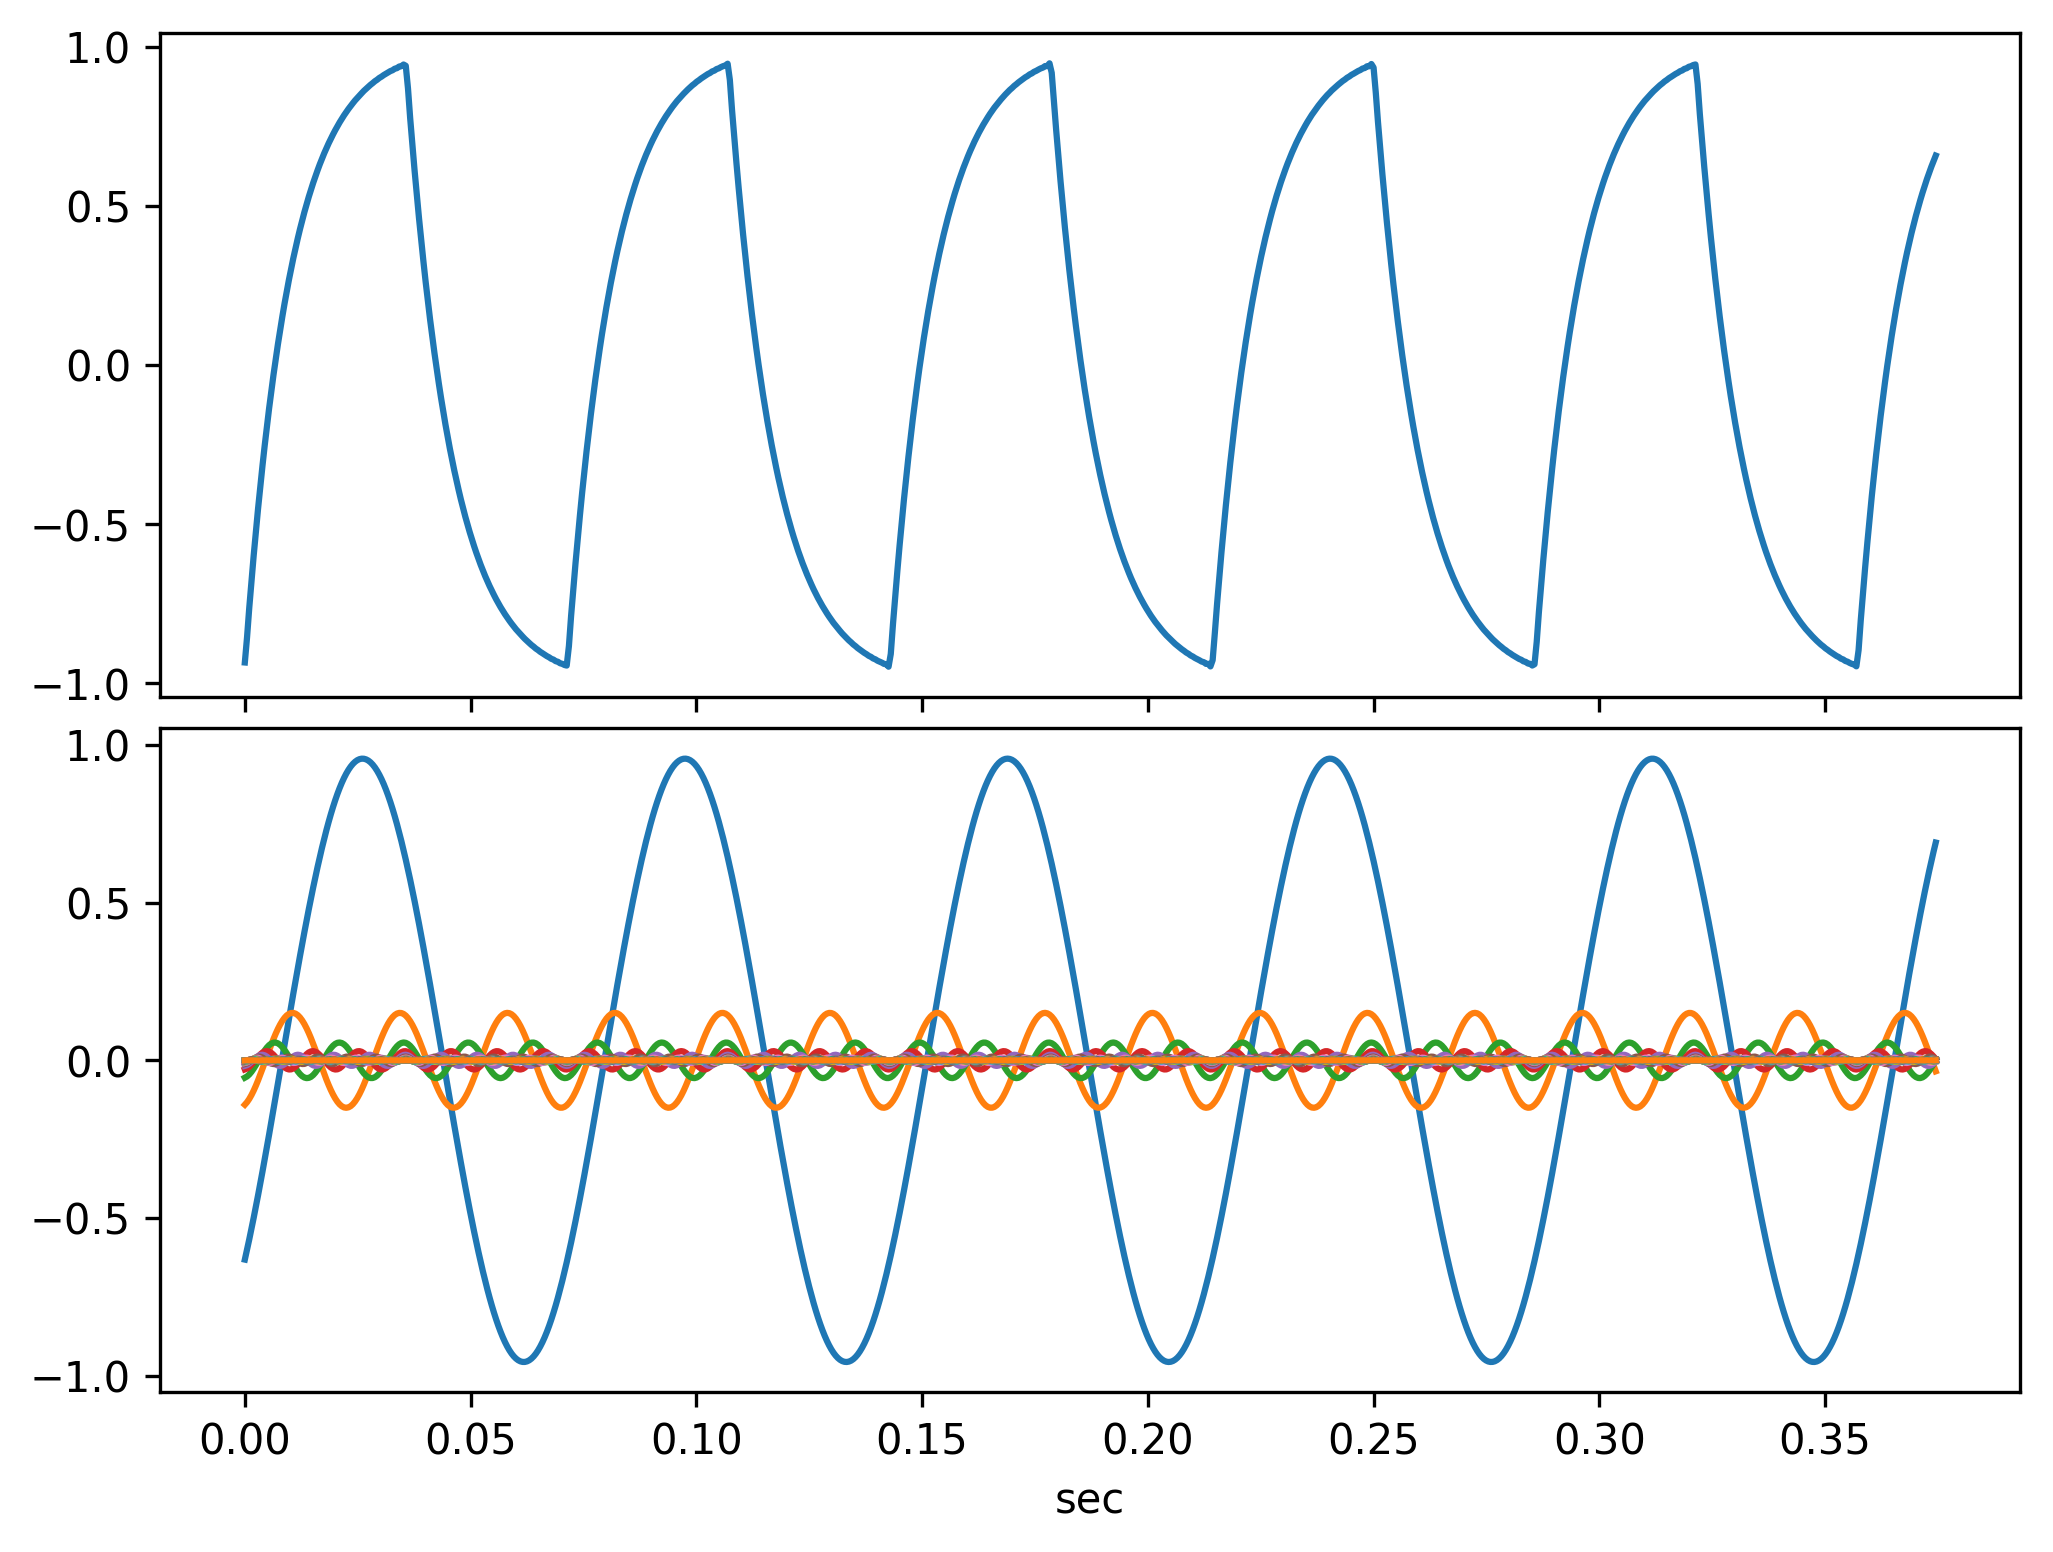

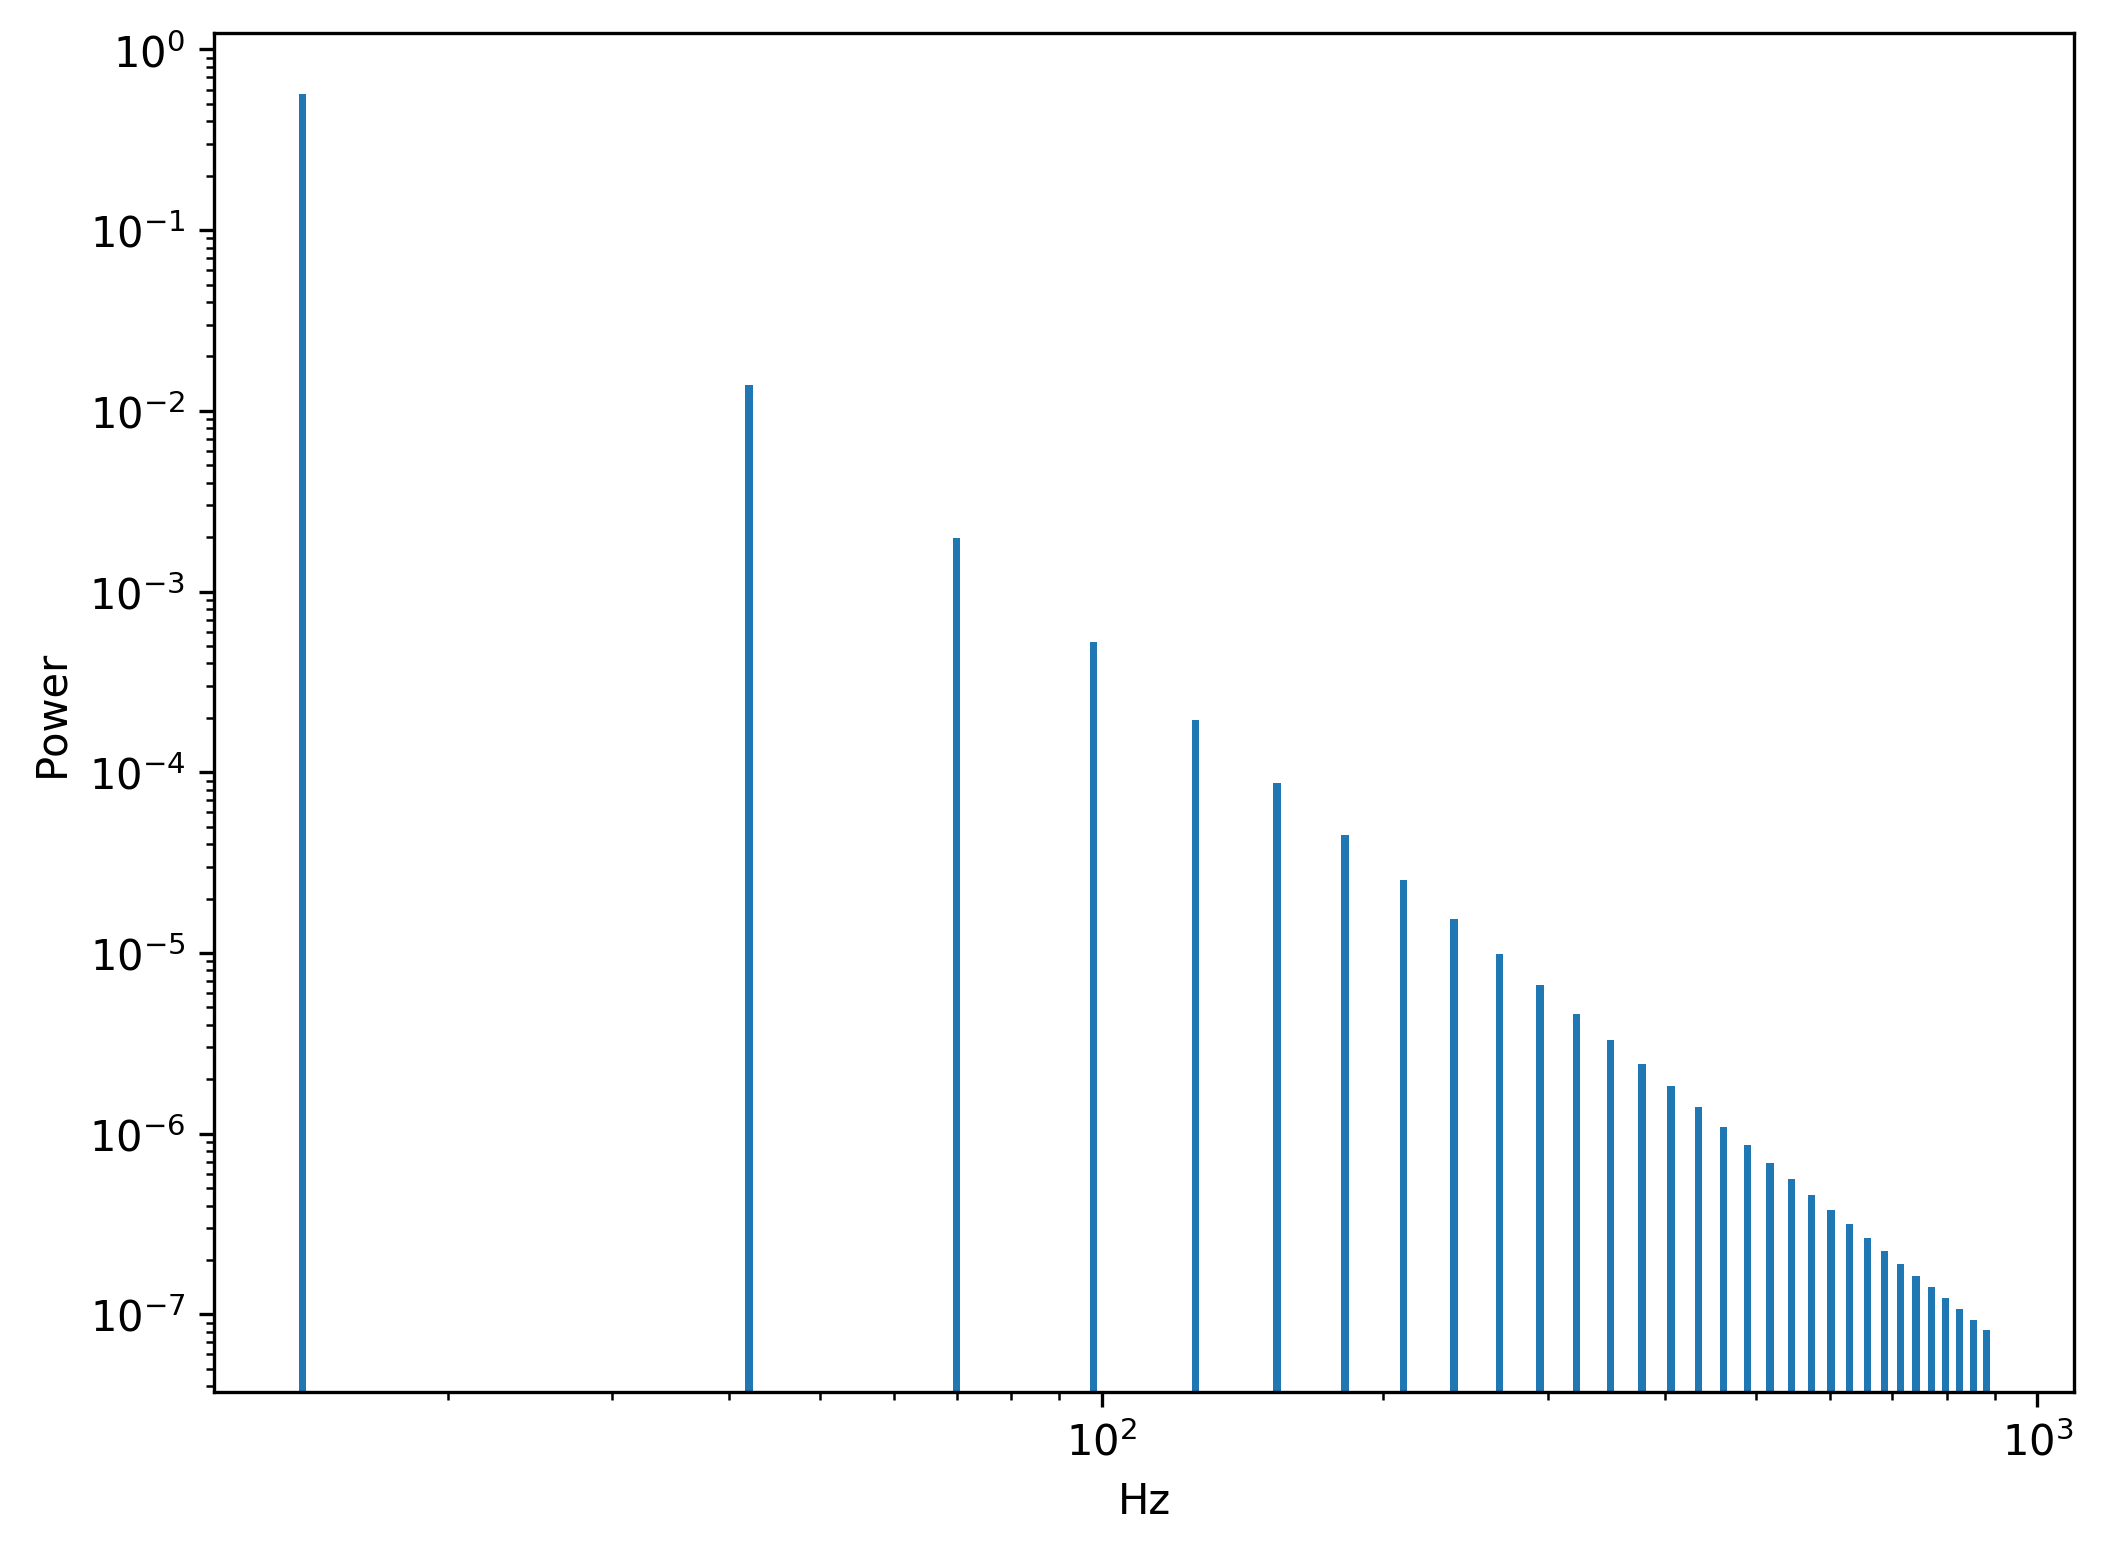

In [28]:
rc = 0.01

xk_int = []
x_int = np.zeros([nt])
ak_int = []

for i in range(len(col_an)):
    ak = col_an[i]
    f = col_bn[i]*f0
    omega = f*2*np.pi

    amp_int = 1/np.sqrt(1+(rc*omega)**2)
    ak_int.append(ak*amp_int)
    phi_int = -np.arctan2(rc*omega,1)
    xk_int.append(4/np.pi*ak*amp_int*np.sin(np.array(t)*(omega)+phi_int))
    x_int = x_int + 4/np.pi*ak*amp_int*np.sin(np.array(t)*(omega)+phi_int)

figure(0,figsize=(8,6),dpi=300)
gs = gridspec.GridSpec(4, 4)
gs.update(hspace=0.1)
ax_lc_int = subplot(gs[0:2, 0:4])
ax_sin_int = subplot(gs[2:4, 0:4], sharex=ax_lc_int)
ax_lc_int.plot(t,x_int)
setp(ax_lc_int.get_xticklabels(), visible=False)
# ax_lc_int.set_xlim([-0.01,0.26])
for i in range(len(col_an)):
    ax_sin_int.plot(t,xk_int[i])
xlabel("sec")

figure(1,figsize=(8,6),dpi=300)
bar(col_bn*f0, np.array(ak_int)**2,width=col_bn/4.,align="center",log=True)
xscale("log")
# yscale("log")
xlabel("Hz")
ylabel("Power")



Text(0,0.5,'Power')

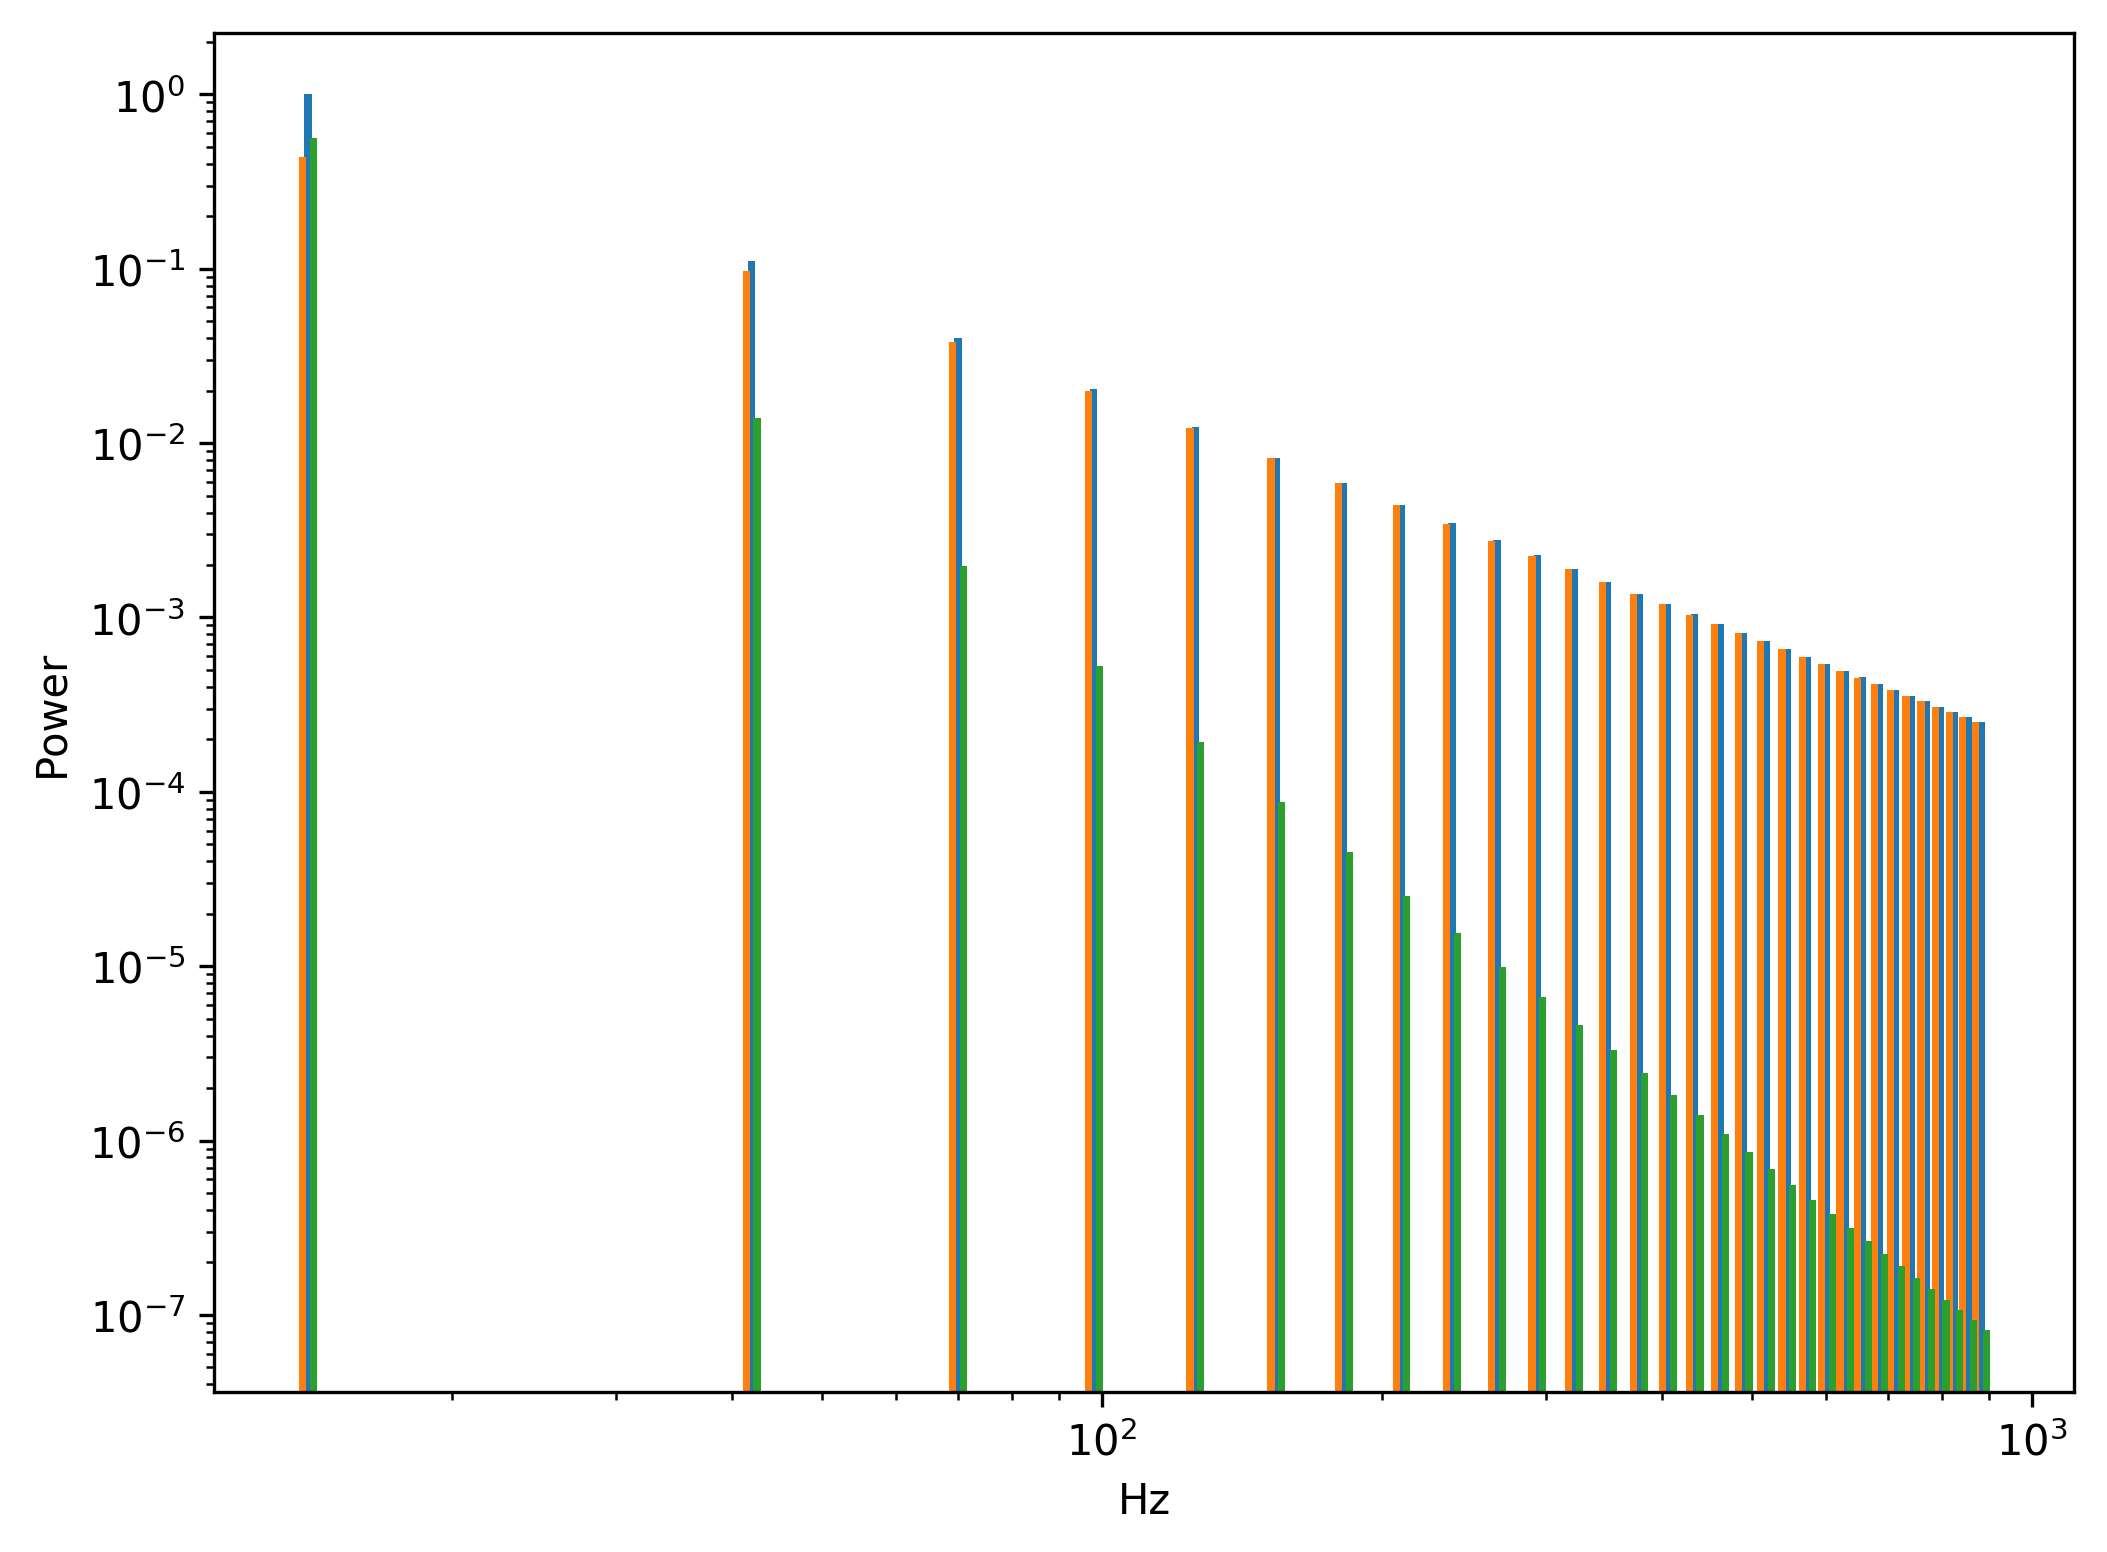

In [17]:
figure(0,figsize=(8,6),dpi=300)
bar(col_bn*f0, col_an**2,width=col_bn/4.,align="center")
bar(col_bn*f0**0.995, np.array(ak_div)**2,width=col_bn/4.,align="center")
bar(col_bn*f0**1.005, np.array(ak_int)**2,width=col_bn/4.,align="center")
xscale("log")
yscale("log")
xlabel("Hz")
ylabel("Power")

